In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
from wordcloud import WordCloud
from PIL import Image
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


import matplotlib.colors
from collections import Counter
cmap2 = cm.get_cmap('twilight',13)
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))
    #print(rgb2hex(rgb))
# Set style
sns.set(style='whitegrid')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Load the data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/thunderstroke325/60-Days-of-Data-Science-and-ML/main/datasets/review_data.csv', low_memory=False, index_col=0)

# Drop duplicates and Null Values
df.drop_duplicates(inplace=True)
df.dropna()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23465 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23465 non-null  int64 
 1   Age                      23465 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22640 non-null  object
 4   Rating                   23465 non-null  int64 
 5   Recommended IND          23465 non-null  int64 
 6   Positive Feedback Count  23465 non-null  int64 
 7   Division Name            23451 non-null  object
 8   Department Name          23451 non-null  object
 9   Class Name               23451 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
# missing values
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3789
Review Text                 825
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000
mean,918.096825,43.200128,4.195355,0.822203,2.538206
std,203.362035,12.280712,1.110278,0.382350,5.704248
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [9]:
# Rating unique values
df.Rating.value_counts()

5    13111
4     5076
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [10]:
# Clas Name counts
df["Class Name"].value_counts()

Dresses           6312
Knits             4835
Blouses           3093
Sweaters          1428
Pants             1388
Jeans             1146
Fine gauge        1099
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [11]:
# Department Name counts
df["Department Name"].value_counts()

Tops        10455
Dresses      6312
Bottoms      3798
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

### Data Visualization

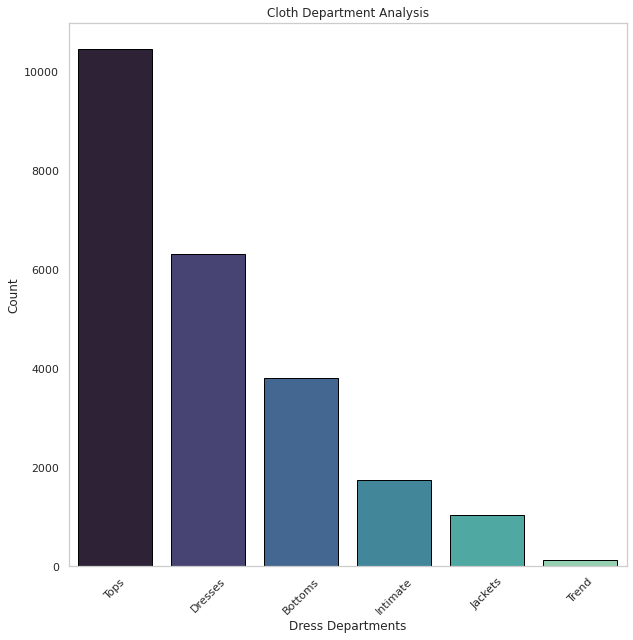

In [12]:
# Cloth Department Analysis
plt.figure(figsize=(10,10))
sns.countplot(x='Department Name',data=df,palette='mako',order=df['Department Name'].value_counts().index,edgecolor='black',linewidth=1)
plt.xlabel('Dress Departments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Cloth Department Analysis')
plt.grid(False)

plt.show()

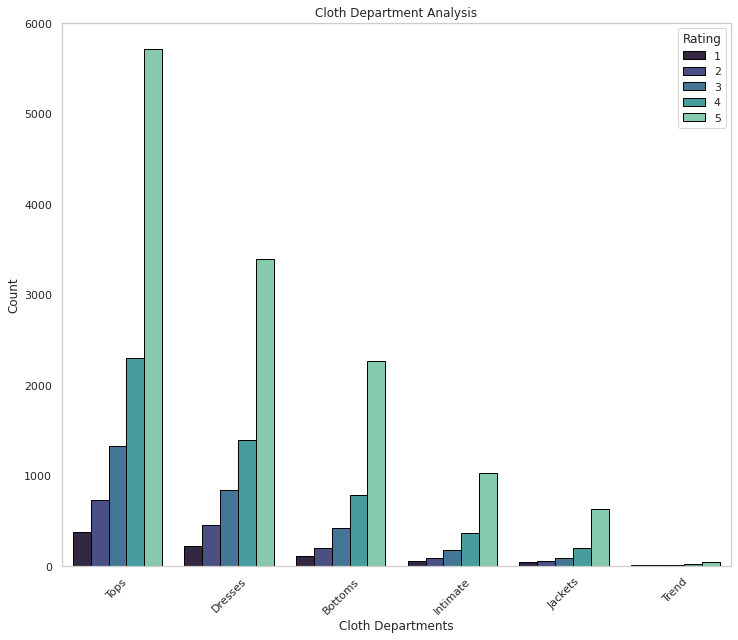

In [13]:
# Cloth Department by Ratings
plt.figure(figsize=(12,10))
sns.countplot(x='Department Name',data=df,palette='mako',order=df['Department Name'].value_counts().index,hue='Rating',edgecolor='black',linewidth=1)
plt.xlabel('Cloth Departments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Cloth Department Analysis')
plt.grid(False)

plt.show()

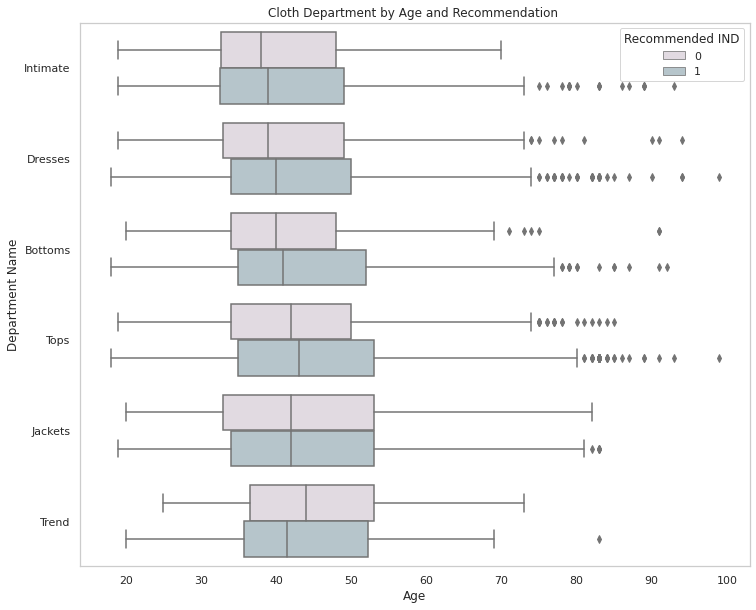

In [14]:
# Cloth Department by Age, Department and Recommendation
plt.figure(figsize=(12,10))
sns.boxplot(x = 'Age', y = 'Department Name', data = df,palette=colors1,hue='Recommended IND')
plt.grid(False)

plt.title('Cloth Department by Age and Recommendation ')
plt.show()

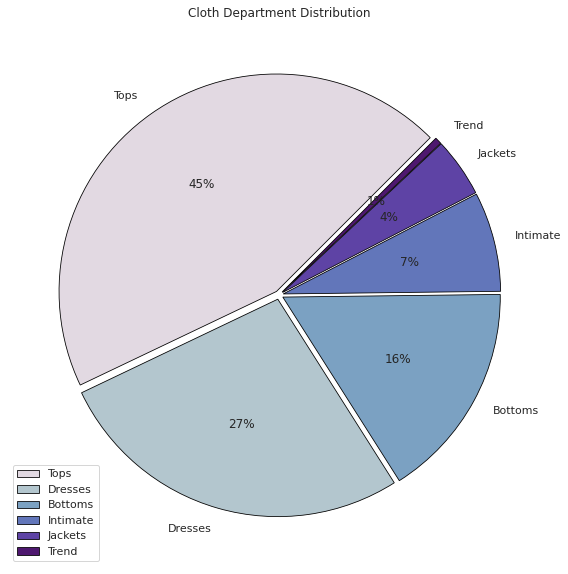

In [15]:
# Cloth Department Distribution
plt.figure(figsize=(12,10))
plt.pie(x=df['Department Name'].value_counts().values,data=df,colors=colors1,labels=df['Department Name'].value_counts().index,autopct='%.0f%%',explode=[0.02 for i in df['Department Name'].value_counts().index],startangle=45,wedgeprops={'linewidth':0.8,'edgecolor':'black'})
plt.title('Cloth Department Distribution')
plt.legend(loc='lower left')

plt.show()

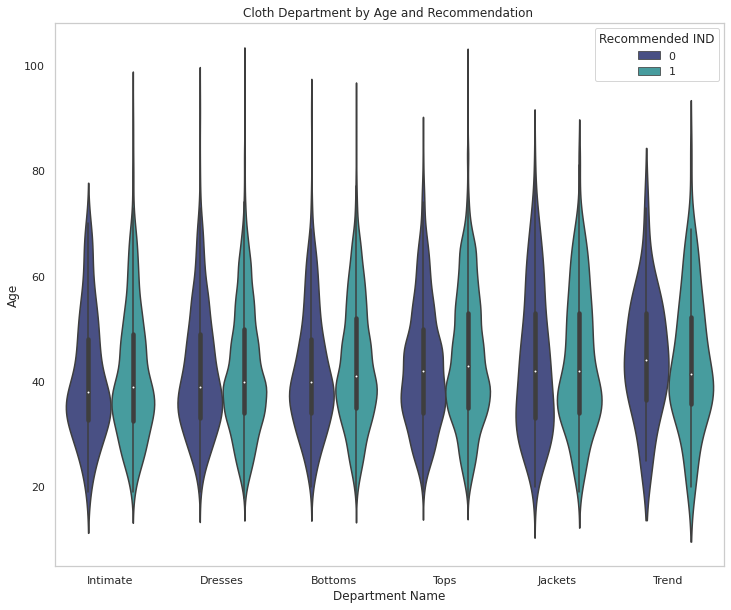

In [16]:
# Cloth Class by Age, Department and Recommendation
plt.figure(figsize=(12,10))
sns.violinplot(x = 'Department Name', y = 'Age', data = df,palette='mako',hue='Recommended IND',orient='v')
plt.grid(False)

plt.title('Cloth Department by Age and Recommendation ')
plt.show()

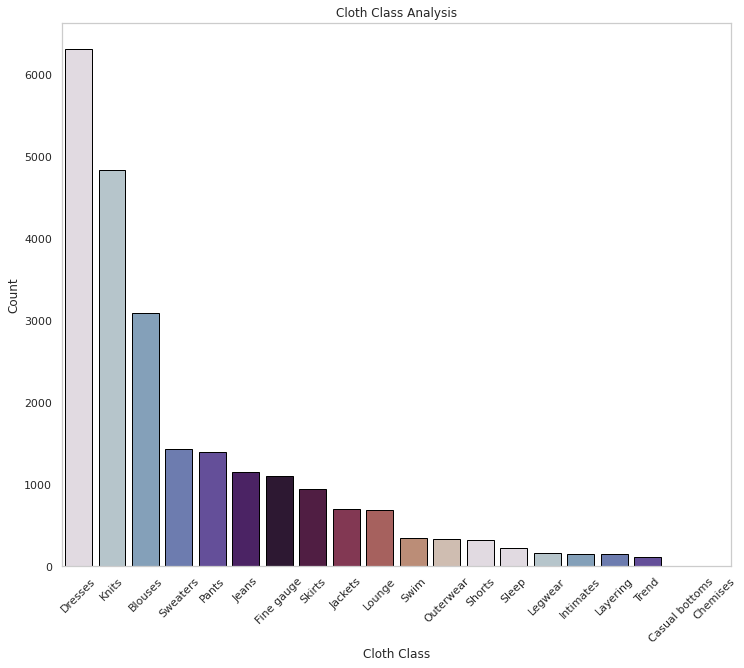

In [17]:
# Cloth Class Analysis
plt.figure(figsize=(12,10))
sns.countplot(x='Class Name',data=df,palette=colors1,order=df['Class Name'].value_counts().index,edgecolor='black',linewidth=1)
plt.xlabel('Cloth Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Cloth Class Analysis')
plt.grid(False)

plt.show()

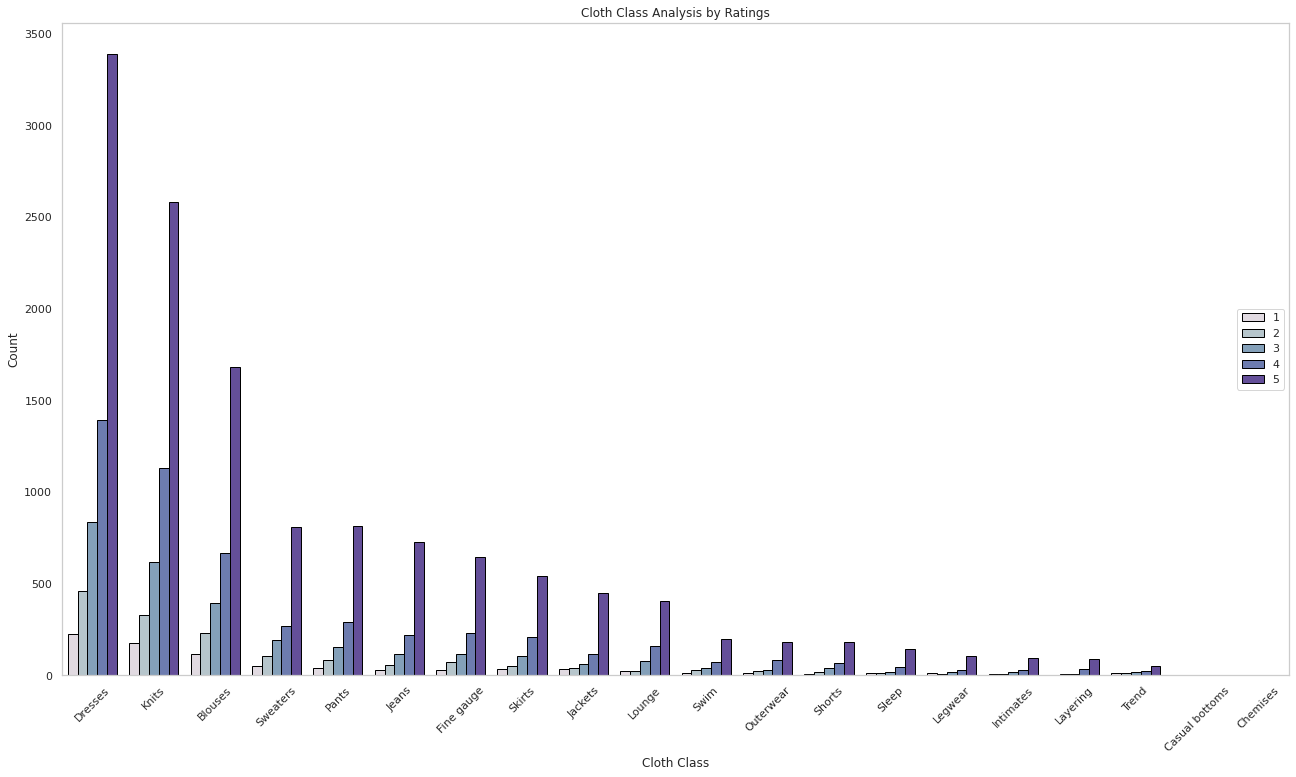

In [18]:
# Cloth Class Analysis by Rating
plt.figure(figsize=(22,12))
sns.countplot(x=df['Class Name'],data=df,palette=colors1,order=df['Class Name'].value_counts().index,edgecolor='black',linewidth=1,hue='Rating')
plt.xlabel('Cloth Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Cloth Class Analysis by Ratings')
plt.grid(False)
plt.legend(loc='right')

plt.show()

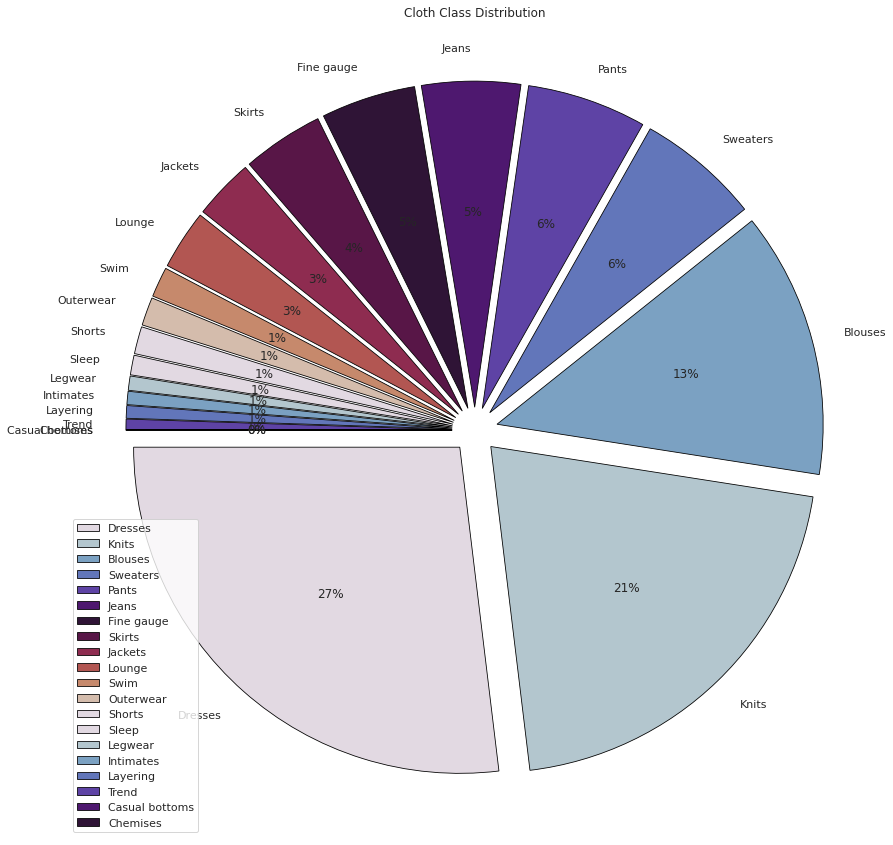

In [19]:
# Cloth Class Distribution
plt.figure(figsize=(18,15))
plt.pie(x=df['Class Name'].value_counts().values,data=df,colors=colors1,labels=df['Class Name'].value_counts().index,autopct='%.0f%%',explode=[0.07 for i in df['Class Name'].value_counts().index],startangle=180,wedgeprops={'linewidth':0.8,'edgecolor':'black'})
plt.title('Cloth Class Distribution')
#plt.grid(False)
plt.legend(loc='lower left')

plt.show()

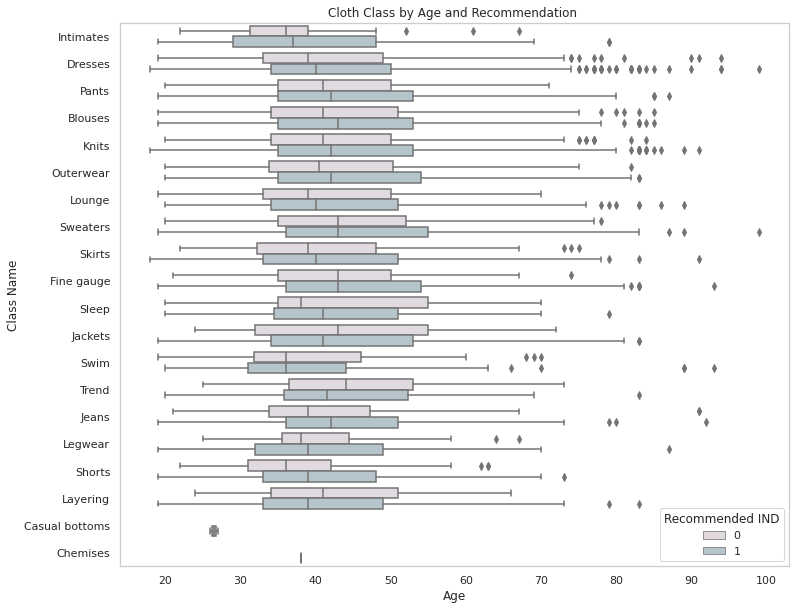

In [20]:
# Cloth Class by Age, Department and Recommendation
plt.figure(figsize=(12,10))
sns.boxplot(x = 'Age', y = 'Class Name', data = df, palette=colors1, hue='Recommended IND')
plt.grid(False)

plt.title('Cloth Class by Age and Recommendation ')
plt.show()

In [21]:
# Division Value Counts
df['Division Name'].value_counts()

General           13839
General Petite     8110
Initmates          1502
Name: Division Name, dtype: int64

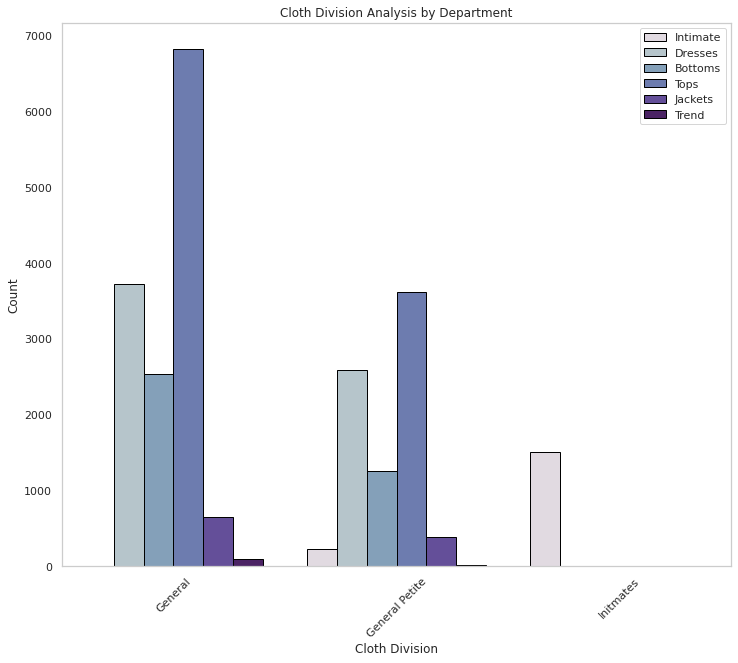

In [22]:
# Cloth Division Analysis by Department
plt.figure(figsize=(12,10))
sns.countplot(x='Division Name',data=df,palette=colors1,order=df['Division Name'].value_counts().index,edgecolor='black',linewidth=1,hue='Department Name')
plt.xlabel('Cloth Division')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Cloth Division Analysis by Department')
plt.grid(False)
plt.legend(loc='upper right')

plt.show()

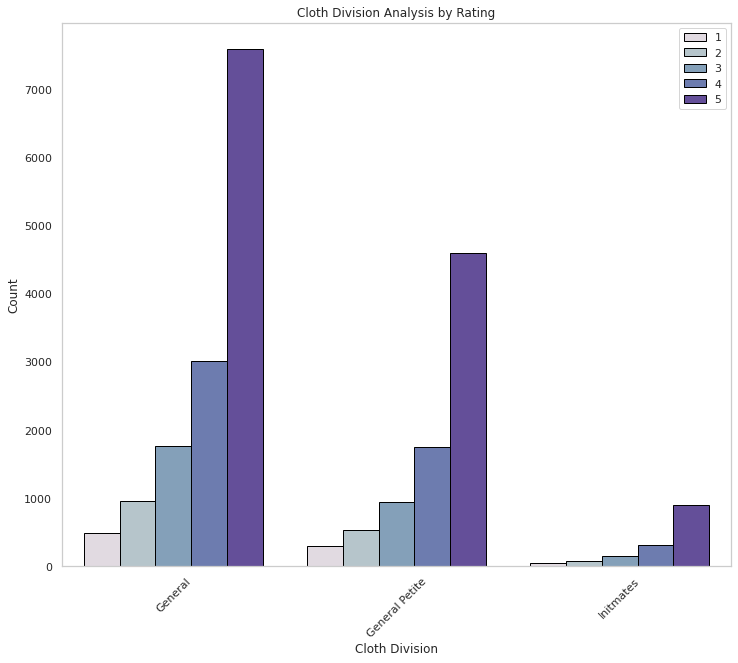

In [23]:
# Cloth Division by Rating
plt.figure(figsize=(12,10))
sns.countplot(x='Division Name',data=df,palette=colors1,order=df['Division Name'].value_counts().index,edgecolor='black',linewidth=1,hue='Rating')
plt.xlabel('Cloth Division')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Cloth Division Analysis by Rating')
plt.grid(False)
plt.legend(loc='upper right')

plt.show()

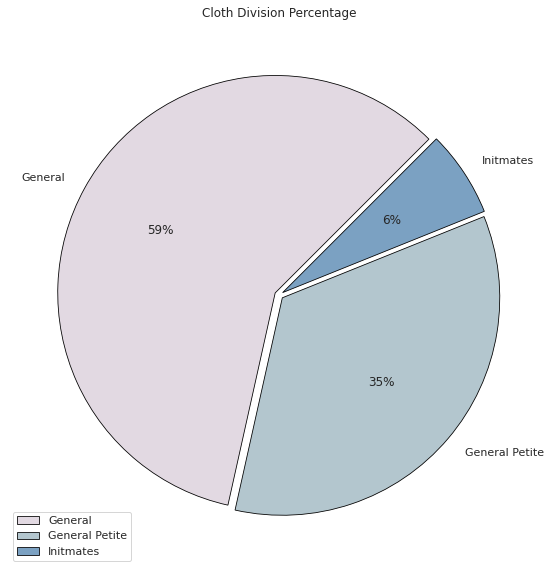

In [24]:
# Cloth Division Percentage
plt.figure(figsize=(12,10))
plt.pie(x=df['Division Name'].value_counts().values,data=df,colors=colors1,labels=df['Division Name'].value_counts().index,autopct='%.0f%%',explode=[0.02 for i in df['Division Name'].value_counts().index],startangle=45,wedgeprops={'linewidth':0.8,'edgecolor':'black'})
plt.title('Cloth Division Percentage')
plt.legend()
plt.show()

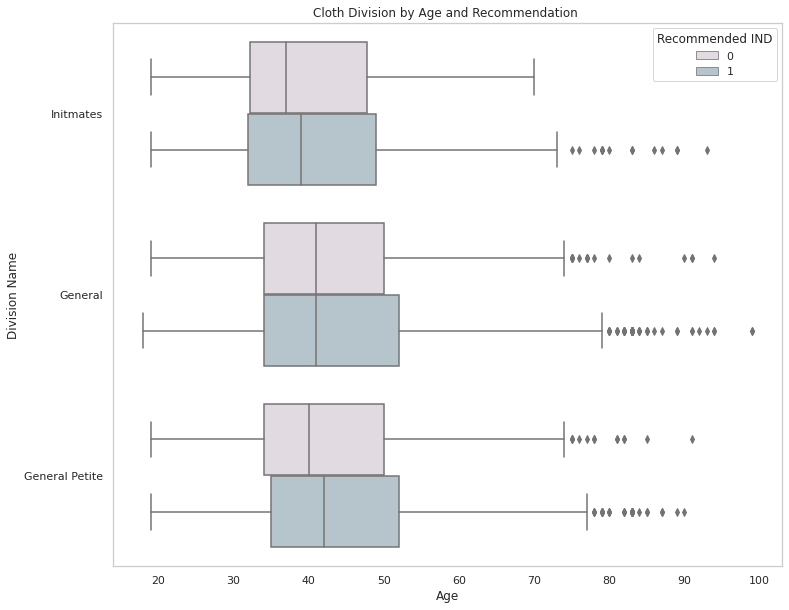

In [25]:
# Cloth Division Name by Age
plt.figure(figsize=(12,10))
sns.boxplot(x = 'Age', y = 'Division Name', data = df,palette=colors1,hue='Recommended IND')
plt.grid(False)

plt.title('Cloth Division by Age and Recommendation ')
plt.show()

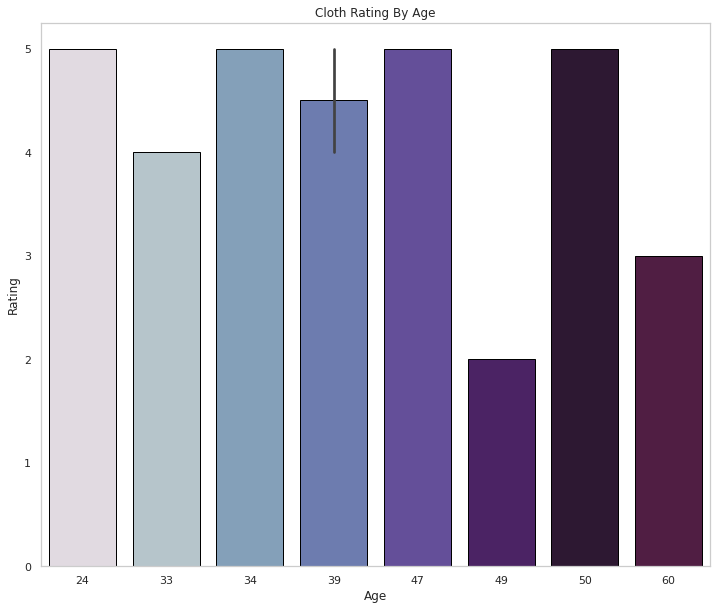

In [26]:
# Rating by Age
plt.figure(figsize=(12,10))
sns.barplot(x=df['Age'].head(10),y='Rating',data=df,palette=colors1,edgecolor='black',linewidth=1)
plt.title('Cloth Rating By Age')
plt.grid(False)

plt.show()

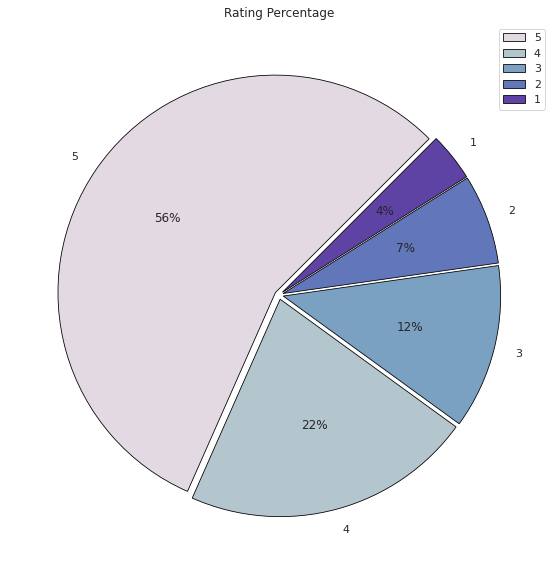

In [27]:
# Rating Percentage
plt.figure(figsize=(12,10))
plt.pie(x=df['Rating'].value_counts().values,data=df,colors=colors1,labels=df['Rating'].value_counts().index,autopct='%.0f%%',explode=[0.02 for i in df['Rating'].value_counts().index],startangle=45,wedgeprops={'linewidth':0.8,'edgecolor':'black'})
plt.title('Rating Percentage')
plt.legend()

plt.show()

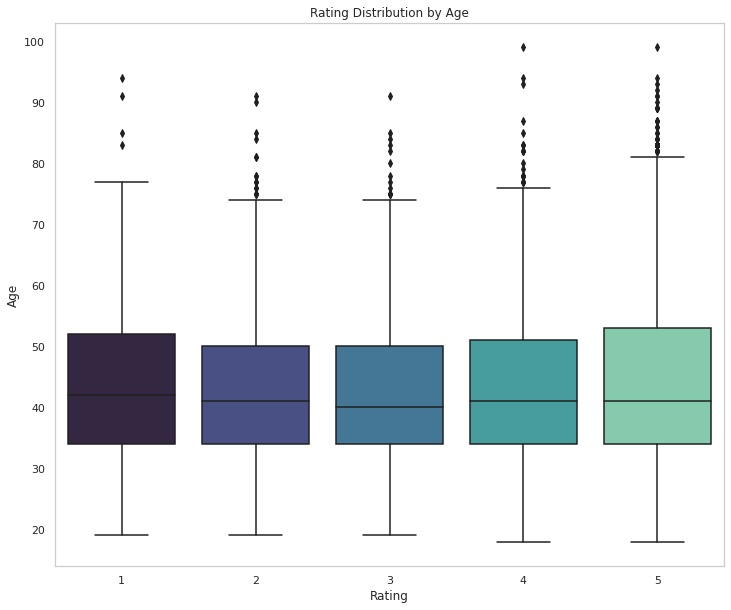

In [28]:
# Rating Distribution by Age
plt.figure(figsize=(12,10))
sns.boxplot(x = 'Rating', y = 'Age', data = df,palette='mako')
plt.grid(False)

plt.title('Rating Distribution by Age')
plt.show()